# Propuesta para realizar integración en un periodo dado 

Las muestras obtenidas para una resolución de 2 seg tienen la siguiente forma

In [2]:
!pip install seaborn

  Using cached scipy-1.5.1-cp37-cp37m-win_amd64.whl (31.2 MB)


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

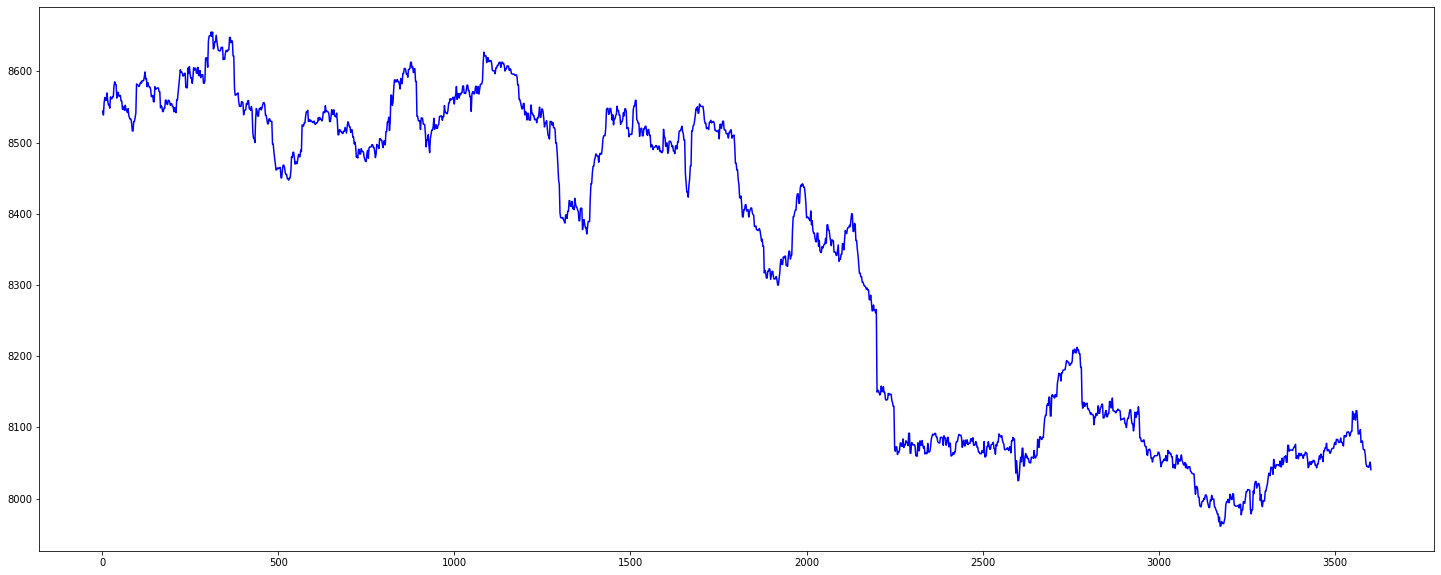

In [3]:
os.getcwd()
hora = pd.read_csv("Muestra_1h.csv")
plt.figure(figsize=(25,10))
plt.plot(hora.seg, hora.dem, 'b-')

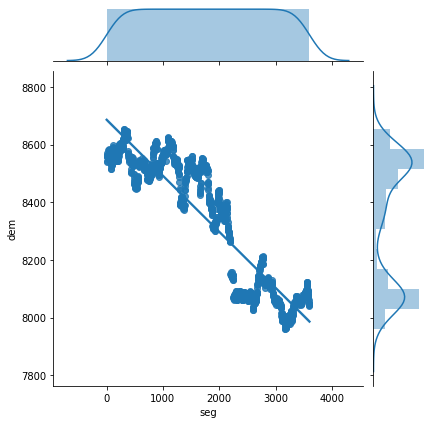

In [4]:
hora_reg = sns.jointplot(data = hora , x = 'seg' , y = 'dem' , kind = 'reg')

In [5]:
hora.head()

,seg,dem,orden
0,2,8544.239258,8655.427734
1,4,8538.705078,8655.117188
2,6,8556.333008,8650.758789
3,8,8563.195313,8649.875000
4,10,8559.343750,8649.875000


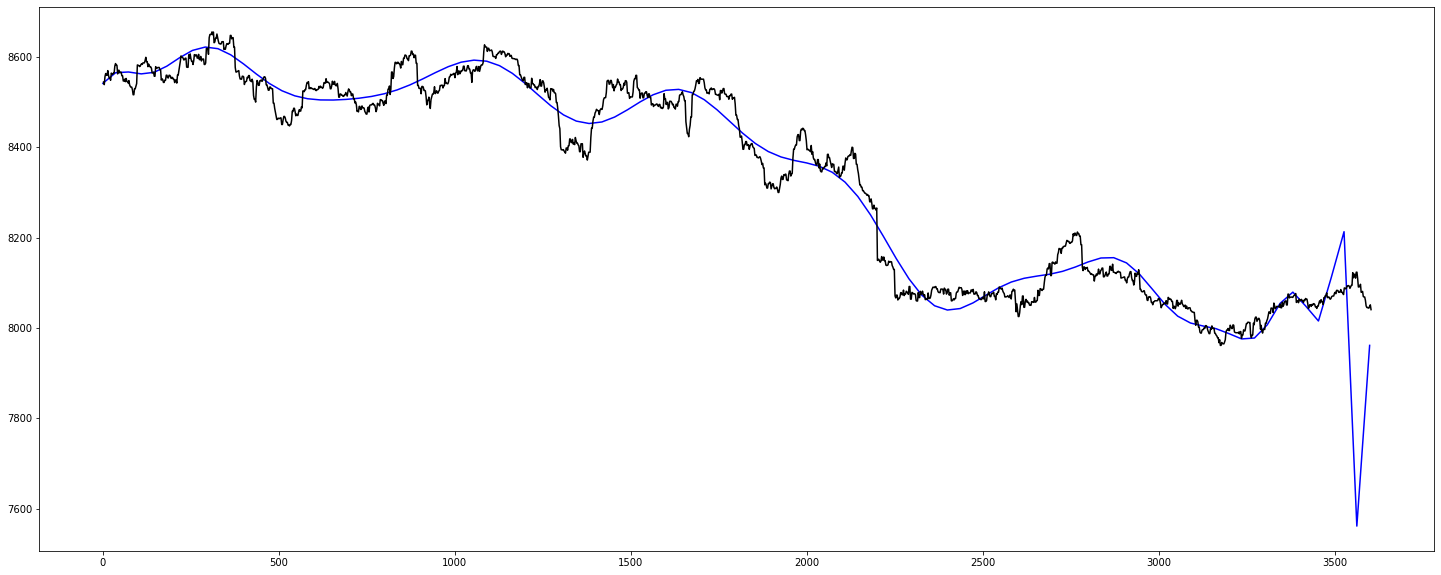

In [6]:
n_m = []
x = []
k = 0
n_puntos = 60 # Solo submúltiplos de 1,800
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+(1800/n_puntos)

y = []
for i in range(len(x)):
    y.append(hora.dem[n_m[i]])

x.append(3598)
y.append(hora.orden[1799])

coef_aj = np.polyfit(x, y, len(x)-1)

neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.dem, 'k-')

In [7]:
coef_aj

array([-0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
        0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000,  0.00000000e+000,
       -0.00000000e+000, -0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  2.72408000e-140,
       -3.48181909e-136,  9.34326348e-133,  3.10168278e-129,
       -4.84396255e-126, -4.54108374e-122, -8.20375896e-119,
        2.48937183e-115,  1.89758399e-111,  4.40511275e-108,
       -5.39007316e-105, -7.69175874e-101, -2.57257725e-097,
       -1.26243336e-094,  2.71711436e-090,  1.31396966e-086,
        2.05646683e-083, -8.36131171e-080, -6.04387400e-076,
       -1.30681041e-072,  2.84396169e-069,  2.73903731e-065,
        5.76721951e-062, -1.71936296e-058, -1.25975126e-054,
       -1.04664989e-051,  1.41866186e-047,  3.86303622e-044,
       -1.39994974e-040, -5.78240826e-037,  2.01911125e-033,
        4.84456628e-030,

Se agrega una columna adcional con los valores ordenados de mayor a menor ya que no nos interesa el orden en que se presentan las demandas. Lo único que interesa es el valor de cada paso de las muestras para calcular la energía y al final sumarlas

In [10]:
hora.head()

,seg,dem,orden
0,2,8544.239258,8655.427734
1,4,8538.705078,8655.117188
2,6,8556.333008,8650.758789
3,8,8563.195313,8649.875000
4,10,8559.343750,8649.875000


In [11]:
hora.tail()

,seg,dem,orden
1795,3592,8045.339844,7967.404297
1796,3594,8044.067383,7965.182617
1797,3596,8044.067383,7965.084961
1798,3598,8048.309570,7964.742188
1799,3600,8051.222168,7961.383789


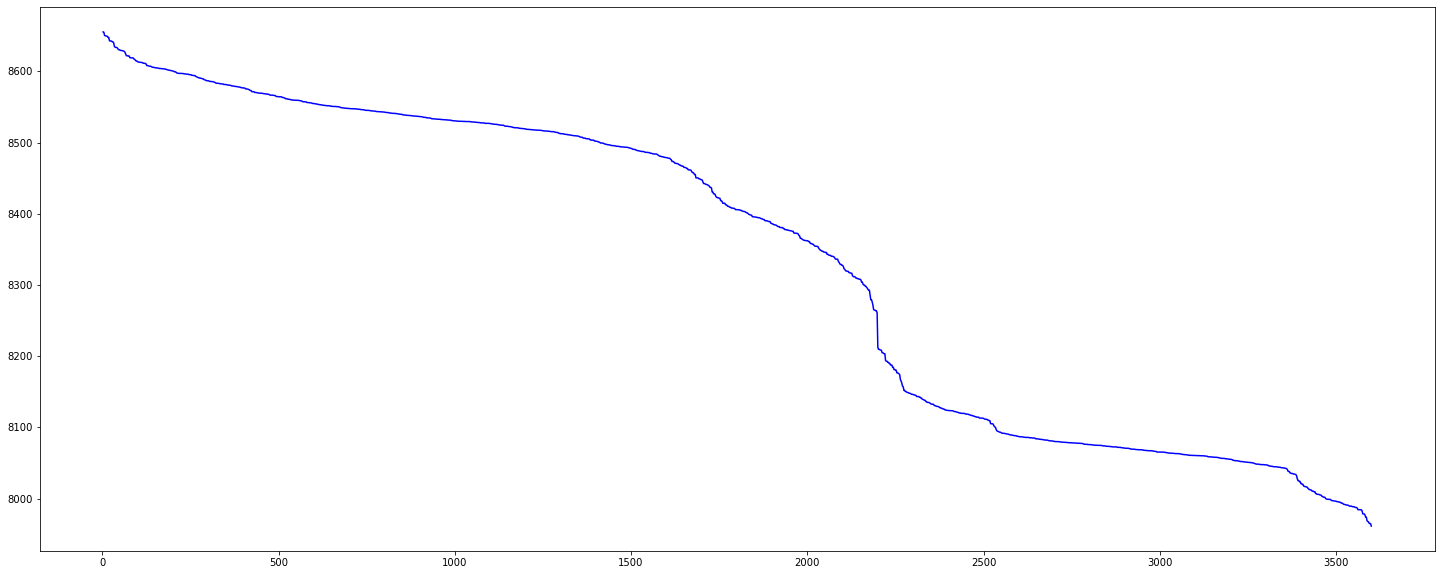

In [12]:
plt.figure(figsize=(25,10))
plt.plot(hora.seg, hora.orden, 'b-')

De esta manera se tiene un forma más fácil de aproximar con polinomios. Los cuales se podrían elegir en secciones cada 500 segundos, por ejemplo, para ajustar un polinomio de grado 7.

In [13]:
n_m = [0,500/2,1000/2,1500/2,2000/2,2500/2,3000/2,1799]
x = [0,500,1000,1500,2000,2500,3000,3600]
y = []
for i in range(len(x)):
    y.append(hora.orden[n_m[i]])
    
coef_aj = np.polyfit(x, y, len(x)-1)

In [14]:
neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

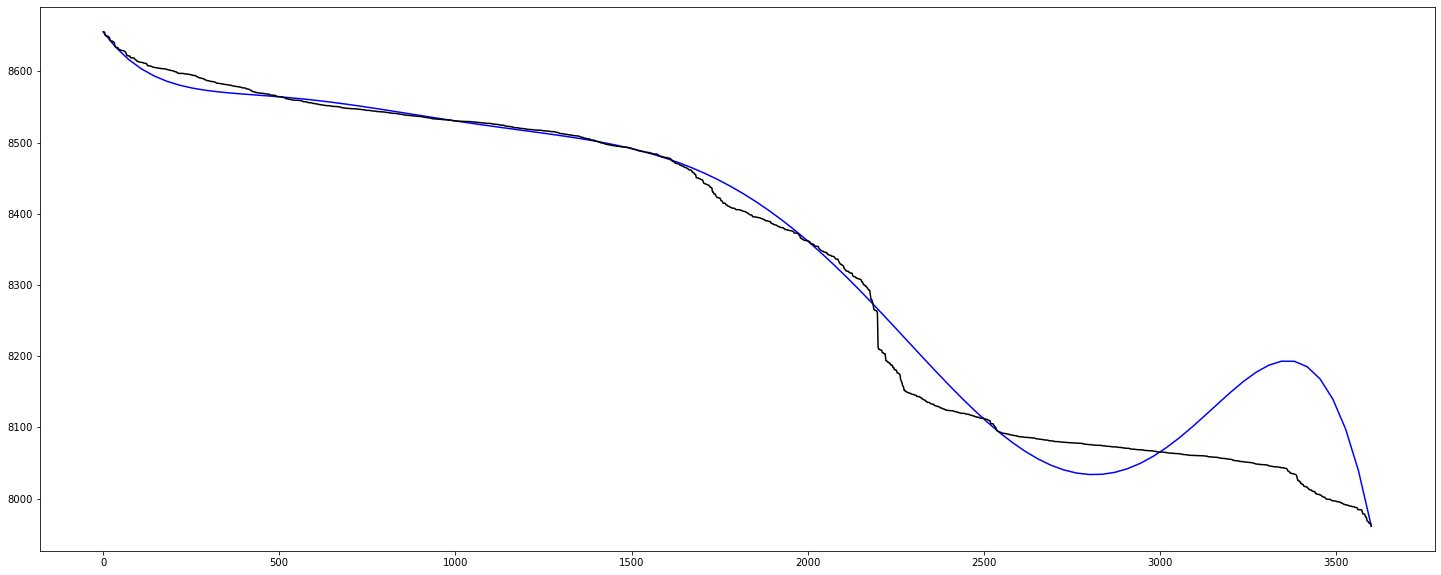

In [15]:
plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.orden, 'k-')

Se podrían hacer más pruebas para ajustar mejor la curva, por ejemplo con 61 puntos.

In [123]:
n_m = []
x = []
k = 0
n_puntos = 60 # Solo submúltiplos de 1,800
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+(1800/n_puntos)

y = []
for i in range(len(x)):
    y.append(hora.orden[n_m[i]])

x.append(3598)
y.append(hora.orden[1799])
print(len(x),len(y))

61 61


In [124]:
coef_aj = np.polyfit(x, y, len(x)-1)

In [125]:
neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

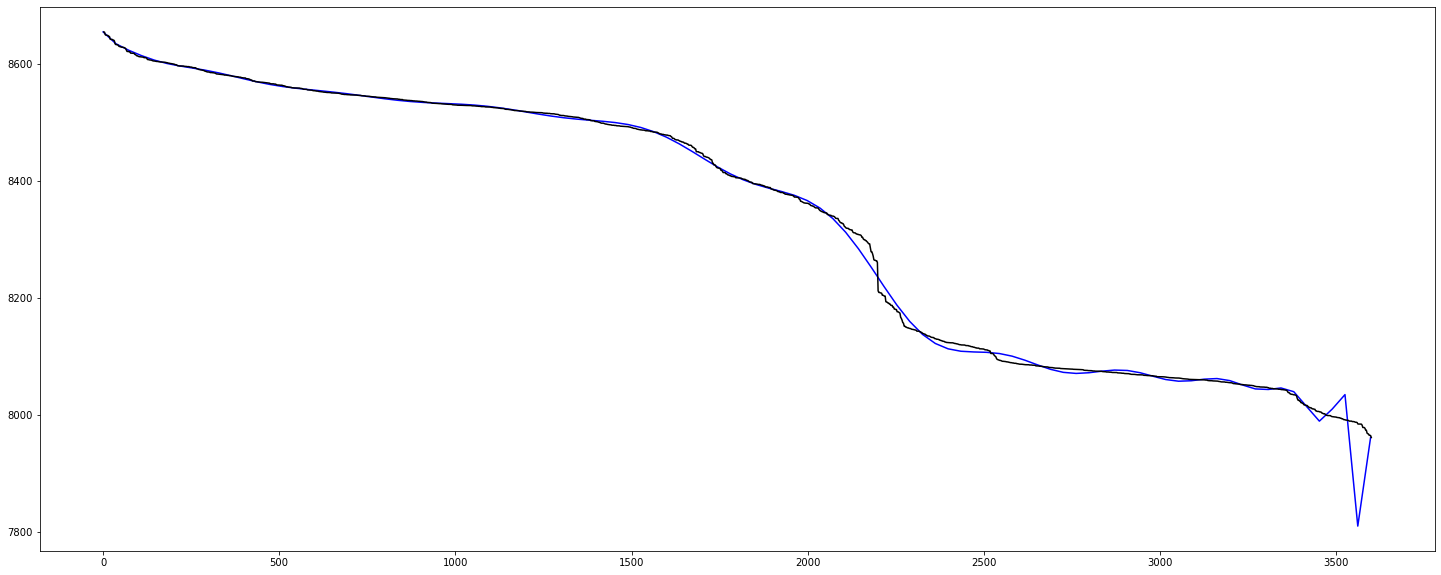

In [126]:
plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.orden, 'k-')

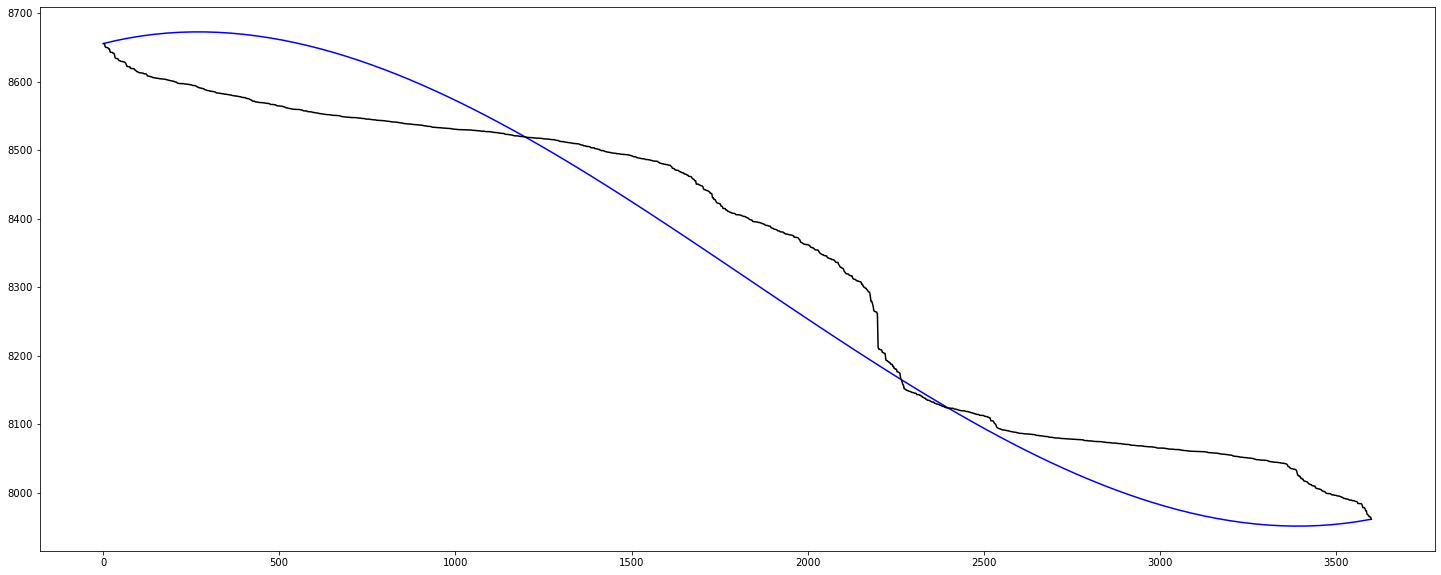

In [127]:
n_m = []
x = []
k = 0
n_puntos = 3 # Solo submúltiplos de 1,800
for i in range(n_puntos):
    n_m.append(k)
    x.append(k*2)
    k = k+(1800/n_puntos)

y = []
for i in range(len(x)):
    y.append(hora.orden[n_m[i]])

x.append(3598)
y.append(hora.orden[1799])

coef_aj = np.polyfit(x, y, len(x)-1)

neval = 100
xeval = np.linspace(min(x), max(x), neval)
yeval = np.polyval(coef_aj,xeval)

plt.figure(figsize=(25,10))
plt.plot(xeval, yeval, 'b-',
         hora.seg, hora.orden, 'k-')

In [128]:
coef_aj

array([ 4.74222730e-08, -2.60459156e-04,  1.30324925e-01,  8.65542773e+03])

In [129]:
from math import sin, sqrt, pi

In [9]:
def Tcf(f,a,b,n): #Tcf: Función creada para calcular la integral con el método del trapecio
    """
    Mediante la regla trapezoidal, calcula la integral de la función en unintérvalo dado, 
    considerando un número dado de intérvalos y un intérvalo deseado.
    Los nodos de los subintérvalos se crean mediante: 
        x_i = a+ih_hat for i=0,1,...,n and h_hat=(b-a)/n
    Argumentos de la función:
        f (función): función de la cual se quiere calcular su integral
        a (float): Extremo inferior del intérvalo
        b (float): Extremo superior del intérvalo
        n (float): número de subintérvalos
    Returns:
        sum_res (float): Cálculo númerico de la integral de f en el intérvalo a,b
    """
    h = b-a
    h_hat = h/n
    
    sum_res = 0
    for i in np.arange(n-1): # Número de subintérvalos
        x = a + (i+1/2)*h_hat # Se crea cada nodo de los subintérvalos
        sum_res+= f(x) # Sumatoria del valor de la función en cada nodo (integral)
    Tcf=f(a)+f(b)+2*sum_res
    return 1/2*h_hat*Tcf

Calculando la integral de la función encontrada

In [11]:
# Polinomi de tercer grado, de la forma ax^3 + bx^2 + cx + d
a = coef_aj[0]
b = coef_aj[1]
c = coef_aj[2]
d = coef_aj[3]

f=lambda x: a*(x**3)+b*(x**2)+c*x+d

Tcf(f,0,3600,10000)

0.0